In [1]:
#importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn import metrics

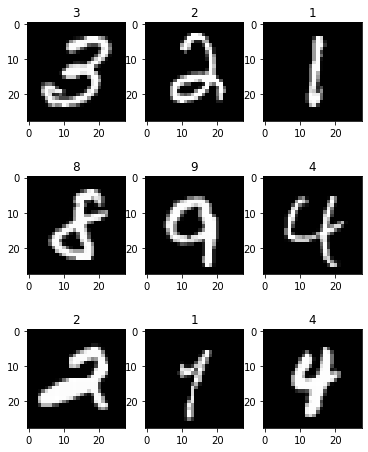

In [2]:
#reading the data
(ds_train, ds_test), ds_info = tfds.load(
    "mnist",#"mnist_corrupted",#'mnist',#'emnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    batch_size = -1,
    with_info=True,)

train_data, val_data, train_labs, val_labs = train_test_split(ds_train[0].numpy(),ds_train[1].numpy(), train_size = 0.7, test_size = 0.3, random_state = 100)

#normalize
train_data = train_data
val_data = val_data

test_data , test_labs= ds_test[0].numpy(),ds_test[1].numpy()
test_data = test_data

#Data Visualization using matplotlib
fig = plt.figure(figsize=(6,8))
for i in range(1, 10):
    fig.add_subplot(3,3,i)
    #print(train_data[i].shape)
    plt.imshow(train_data[i].reshape(28,28),cmap='gray')
    plt.grid(False)
    plt.title(train_labs[i])

## FC

In [3]:
model = tf.keras.Sequential([
    keras.layers.InputLayer(input_shape=(28,28, 1)),                         
    keras.layers.Lambda(lambda x: x/255.0),
    keras.layers.Flatten(),
    keras.layers.Dense(190, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 28, 28, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 190)               149150    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               24448     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                6

In [4]:
model.compile(optimizer = "adam", loss = tf.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
hist = model.fit(x = train_data, y = train_labs, batch_size = 32, epochs= 10, verbose = 1, validation_data = (val_data,val_labs))


Epoch 1/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.2701 - accuracy: 0.9187 - val_loss: 0.1318 - val_accuracy: 0.9589
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1129 - accuracy: 0.9656 - val_loss: 0.1242 - val_accuracy: 0.9635
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0783 - accuracy: 0.9759 - val_loss: 0.0998 - val_accuracy: 0.9701
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0632 - accuracy: 0.9799 - val_loss: 0.1002 - val_accuracy: 0.9724
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0516 - accuracy: 0.9835 - val_loss: 0.0974 - val_accuracy: 0.9732
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0446 - accuracy: 0.9865 - val_loss: 0.1096 - val_accuracy: 0.9691
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.1182 - val_accuracy:

In [5]:
modelo_fc=model
modelo_fc.save(f"22-05_modelo_fc_ejemplo.h5")

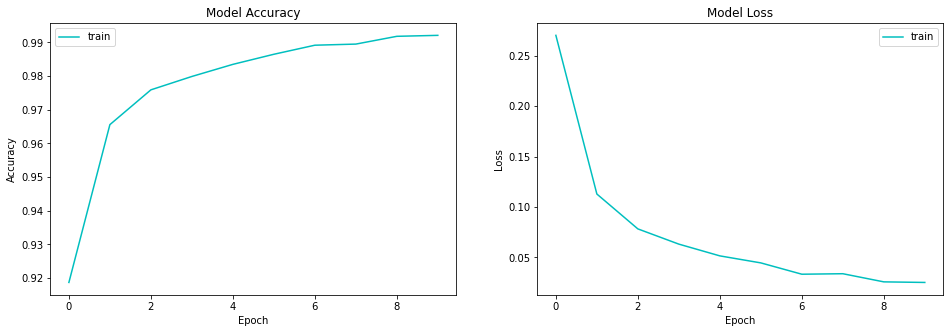

In [6]:
def plot_training(history):
    fig, axs = plt.subplots(1,2,figsize=(16,5)) 
    axs[0].plot(history.history['accuracy'], 'c') 
    axs[0].set_title('Model Accuracy') 
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch') 
    axs[0].legend(['train', 'validate'], loc='upper left') 
    
    axs[1].plot(history.history['loss'], 'c') 
    axs[1].set_title('Model Loss') 
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch') 
    axs[1].legend(['train', 'validate'], loc='upper right') 
    plt.show()
plot_training(hist)

In [7]:
y_pred=modelo_fc.predict(test_data).argmax(axis=1)
print(metrics.classification_report(test_labs, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.99      0.95      0.97       982
           5       0.96      0.97      0.97       892
           6       0.96      0.98      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## CNN

In [8]:
model = models.Sequential([         
  keras.layers.InputLayer(input_shape=(28,28, 1)),                          
  keras.layers.Lambda(lambda x: x/255.0),               
  keras.layers.Conv2D(256, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Conv2D(128, (2,2), activation='relu'),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Conv2D(64, (2,2), activation='relu',padding="same"),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Conv2D(64, (2,2), activation='relu',padding="same"),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       131200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [9]:
#compiling
model.compile(optimizer = "adam", loss = tf.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
hist = model.fit(x = train_data, y = train_labs, batch_size = 32, epochs= 10, verbose = 1, validation_data = (val_data,val_labs))


Epoch 1/10
1313/1313 [==============================] - 12s 8ms/step - loss: 0.2220 - accuracy: 0.9286 - val_loss: 0.0804 - val_accuracy: 0.9744
Epoch 2/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0623 - accuracy: 0.9811 - val_loss: 0.0715 - val_accuracy: 0.9774
Epoch 3/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0530 - val_accuracy: 0.9841
Epoch 4/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0355 - accuracy: 0.9887 - val_loss: 0.0431 - val_accuracy: 0.9853
Epoch 5/10
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0747 - val_accuracy: 0.9784
Epoch 6/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0375 - val_accuracy: 0.9892
Epoch 7/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0431 - val_ac

In [10]:
modelo_cnn=model
modelo_cnn.save(f"22-05_modelo_cnn_ejemplo.h5")

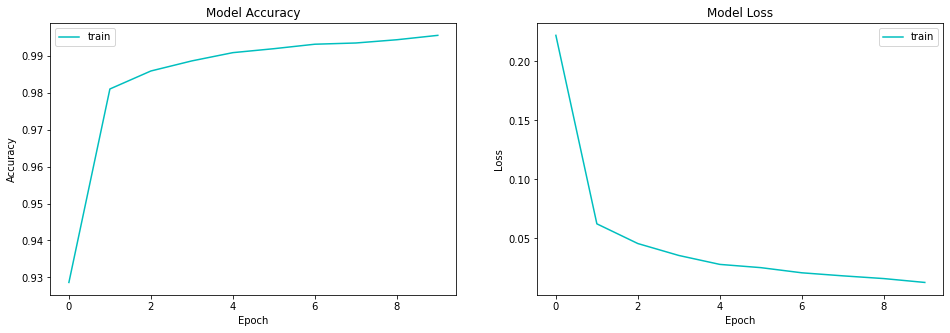

In [11]:
plot_training(hist)

In [12]:
y_pred=modelo_cnn.predict(test_data).argmax(axis=1)
print(metrics.classification_report(test_labs, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Traslaciones

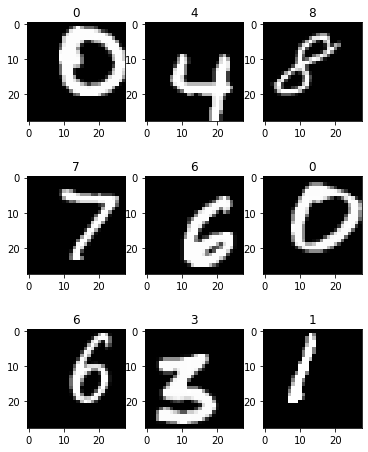

In [14]:
#reading the data
(ds_train, ds_test), ds_info = tfds.load(
    "mnist_corrupted/translate",#"mnist_corrupted",#'mnist',#'emnist',
    split=["train",'test'],
    shuffle_files=True,
    as_supervised=True,
    batch_size = -1,
    with_info=True,)

test_data_cor = ds_test[0].numpy()
test_labs_cor = ds_test[1].numpy()
test_data_cor = test_data_cor

#Data Visualization using matplotlib
fig = plt.figure(figsize=(6,8))
for i in range(1, 10):
    fig.add_subplot(3,3,i)
    #print(test_data[i].shape)
    plt.imshow(test_data_cor[i].reshape(28,28),cmap='gray')
    plt.grid(False)
    plt.title(test_labs_cor[i])

In [15]:
y_pred=modelo_fc.predict(test_data_cor).argmax(axis=1)
print(metrics.classification_report(test_labs_cor, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.04      0.07       980
           1       0.46      0.22      0.30      1135
           2       0.30      0.44      0.35      1032
           3       0.27      0.28      0.28      1010
           4       0.66      0.20      0.31       982
           5       0.30      0.38      0.33       892
           6       0.29      0.58      0.39       958
           7       0.34      0.47      0.40      1028
           8       0.22      0.24      0.23       974
           9       0.31      0.28      0.29      1009

    accuracy                           0.31     10000
   macro avg       0.34      0.31      0.29     10000
weighted avg       0.35      0.31      0.29     10000



(3118, 28, 28, 1)


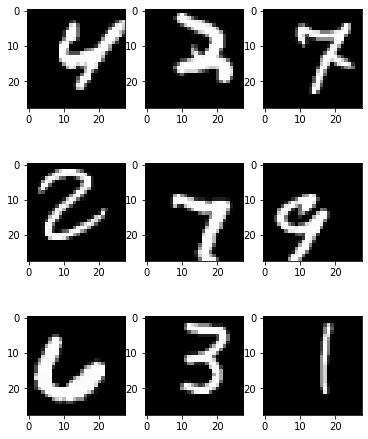

In [16]:
correctas=test_data_cor[test_labs_cor==y_pred]
print(correctas.shape)
#Data Visualization using matplotlib
fig = plt.figure(figsize=(6,8))
for i in range(1, 10):
    fig.add_subplot(3,3,i)
    #print(test_data[i].shape)
    plt.imshow(correctas[10*i].reshape(28,28),cmap='gray')
    plt.grid(False)

In [17]:
y_pred=modelo_cnn.predict(test_data_cor).argmax(axis=1)
print(metrics.classification_report(test_labs_cor, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       980
           1       0.84      0.78      0.81      1135
           2       0.83      0.74      0.78      1032
           3       0.87      0.81      0.84      1010
           4       0.78      0.71      0.74       982
           5       0.70      0.96      0.81       892
           6       0.51      0.64      0.57       958
           7       0.71      0.95      0.81      1028
           8       0.77      0.58      0.66       974
           9       0.73      0.56      0.64      1009

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.74     10000
weighted avg       0.76      0.75      0.75     10000



(7476, 28, 28, 1)


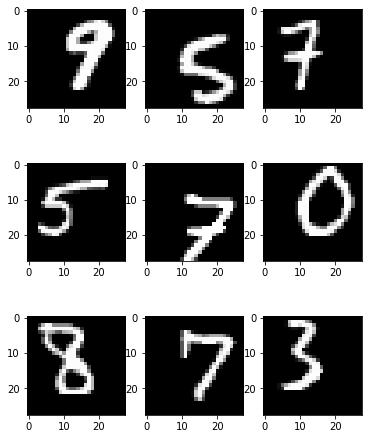

In [18]:
correctas=test_data_cor[test_labs_cor==y_pred]
print(correctas.shape)
#Data Visualization using matplotlib
fig = plt.figure(figsize=(6,8))
for i in range(1, 10):
    fig.add_subplot(3,3,i)
    #print(test_data[i].shape)
    plt.imshow(correctas[10*i].reshape(28,28),cmap='gray')
    plt.grid(False)